In [40]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [41]:
df = pd.read_csv('data/netflix_titles.csv', encoding='unicode_escape')

In [42]:
df.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# some cols appear to be wrong - check with NaN's
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

In [44]:
# drop columns that are only null
df = df.dropna(how='all', axis=1)

In [45]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [46]:
# Check Col-Types
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [47]:
# add column 'year_date_added' from col 'date_added'
df['year_date_added'] = df['date_added'].str[-4:].astype('float')
df['year_date_added'].isna().sum()

10

In [48]:
# drop these NaN's for further analysis with this col
df = df.dropna(subset='year_date_added')
df['year_date_added'].isna().sum()

0

# Question 1: Is there a trend towards TV-Shows over time?

In [49]:
df.type.value_counts()

type
Movie      6132
TV Show    2667
Name: count, dtype: int64

In [50]:
counts = df.groupby(['type', 'year_date_added']).size().reset_index(name='count')

In [51]:
# There are no data points for 2022 and 2023, only one for 2024 - consider only until 2021
counts = counts[(counts['year_date_added'] >= 2013) & (counts['year_date_added'] <= 2021)]

(array([2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.,
        2021., 2022.]),
 [Text(2012.0, 0, '2012'),
  Text(2013.0, 0, '2013'),
  Text(2014.0, 0, '2014'),
  Text(2015.0, 0, '2015'),
  Text(2016.0, 0, '2016'),
  Text(2017.0, 0, '2017'),
  Text(2018.0, 0, '2018'),
  Text(2019.0, 0, '2019'),
  Text(2020.0, 0, '2020'),
  Text(2021.0, 0, '2021'),
  Text(2022.0, 0, '2022')])

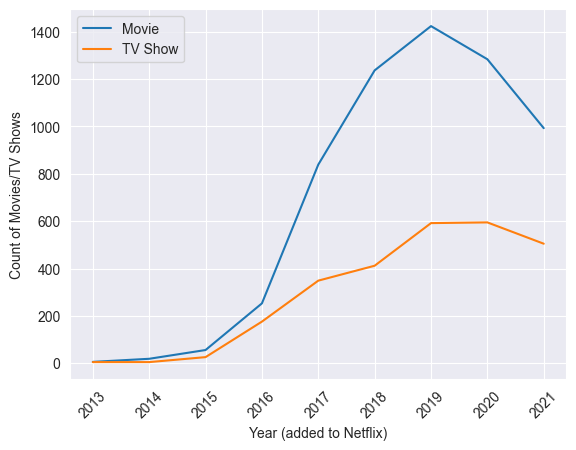

In [52]:
sns.lineplot(data=counts, x='year_date_added', y='count', hue='type')
plt.xlabel('Year (added to Netflix)')
plt.ylabel('Count of Movies/TV Shows')
plt.legend(title=None)
plt.xticks(rotation=45)

In [53]:
counts_only_tv_shows = counts.loc[counts.type == 'TV Show']
counts_only_movies = counts.loc[counts.type == 'Movie']

In [54]:
# yoy changes in both categories
counts_only_tv_shows['yoy_change'] = counts_only_tv_shows['count'].pct_change()
counts_only_movies['yoy_change'] = counts_only_movies['count'].pct_change()


/var/folders/2b/khy760n51ts4ttpl1yhdkm640000gn/T/ipykernel_12294/2166827927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts_only_tv_shows['yoy_change'] = counts_only_tv_shows['count'].pct_change()
/var/folders/2b/khy760n51ts4ttpl1yhdkm640000gn/T/ipykernel_12294/2166827927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts_only_movies['yoy_change'] = counts_only_movies['count'].pct_change()


In [55]:
counts_only_tv_shows = counts_only_tv_shows[(counts_only_tv_shows['year_date_added'] >= 2013) & (counts_only_tv_shows['year_date_added'] <= 2021)]
counts_only_movies = counts_only_movies[(counts_only_movies['year_date_added'] >= 2013) & (counts_only_movies['year_date_added'] <= 2021)]

In [56]:
counts_only_tv_shows = counts_only_tv_shows.sort_values(by='year_date_added')
counts_only_movies = counts_only_movies.sort_values(by='year_date_added')

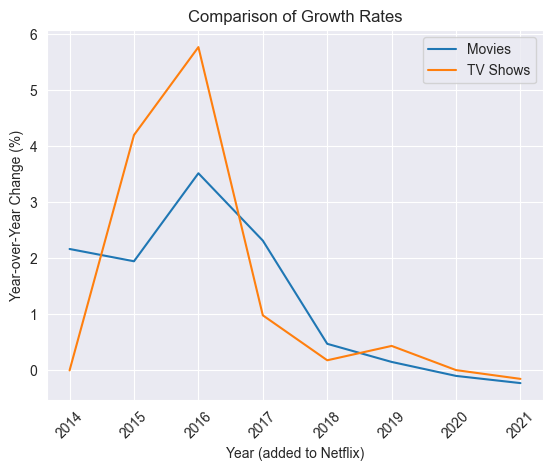

In [57]:
plt.plot(counts_only_movies['year_date_added'], counts_only_movies['yoy_change'], label='Movies')
plt.plot(counts_only_tv_shows['year_date_added'], counts_only_tv_shows['yoy_change'], label='TV Shows')

# Add labels and title
plt.xlabel('year_date_added')
plt.ylabel('Year-over-Year Change (%)')
plt.title('Comparison of Growth Rates')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Year (added to Netflix)')
plt.show()

# Question 2: Are there differences in countries regarding the decision wheter to produce TV Shows or Movies?

In [58]:
# select only rows with a single country - multiple production countries could show different pattern
df_filtered = df[df['country'].astype(str).str.count(',') == 0]

In [59]:
df_filtered = df_filtered.dropna(subset='country')

In [60]:
df_filtered.shape

(6649, 13)

In [61]:
country_df = df_filtered.groupby(['type', 'country']).size().reset_index(name='count')

In [62]:
# Get 10 largest countries by count in Movies / TV Shows
country_df.groupby('type').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

,type,country,count
0,Movie,United States,2059
1,Movie,India,893
2,Movie,United Kingdom,206
3,Movie,Canada,122
4,Movie,Spain,97
5,Movie,Egypt,92
6,Movie,Nigeria,86
7,Movie,Indonesia,77
8,Movie,Japan,76
9,Movie,Turkey,76


In [63]:
# Add Sum for each country to calculate percentage
country_df['production_sum'] = country_df.groupby(['country'])['count'].transform('sum')
country_df.head()

,type,country,count,production_sum
0,Movie,Argentina,38,56
1,Movie,Australia,39,86
2,Movie,Austria,5,5
3,Movie,Bangladesh,3,3
4,Movie,Belgium,1,9


In [64]:
country_df['percentage'] = country_df['count'] / country_df['production_sum']

In [65]:
country_df_top5 = country_df.loc[country_df['count'] > 50].groupby('type').apply(lambda x: x.nlargest(10, 'percentage'))

In [66]:
country_df_top5.head(10)

type        country  count  production_sum  percentage
type                                                             
Movie 24  Movie      Indonesia     77              79    0.974684
      43  Movie    Philippines     73              75    0.973333
      23  Movie          India    893             972    0.918724
      39  Movie        Nigeria     86              95    0.905263
      14  Movie          Egypt     92             106    0.867925
      59  Movie  United States   2059            2813    0.731959
      56  Movie         Turkey     76             105    0.723810
      9   Movie         Canada    122             181    0.674033
      51  Movie          Spain     97             145    0.668966
      34  Movie         Mexico     70             110    0.636364

/var/folders/2b/khy760n51ts4ttpl1yhdkm640000gn/T/ipykernel_12294/3828705942.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_subset['country'], rotation=45)


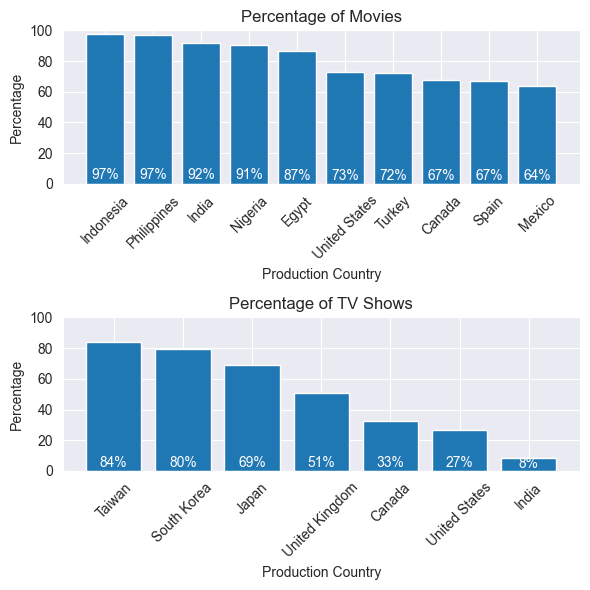

In [67]:
fig, axs = plt.subplots(2, 1, figsize=(6,6))

for i, t in enumerate(country_df_top5['type'].unique()):
    df_subset = country_df_top5[country_df_top5['type'] == t]
    ax = axs[i]
    ax.bar(df_subset['country'], df_subset['percentage']*100, )
    #ax.plot(df_subset['ID'], df_subset['value2'], label='value2')
    ax.set_title(f"Percentage of {t}s")
    #ax.legend()
    ax.set_xticklabels(df_subset['country'], rotation=45)

    # Show values on the plot
    for x, y1 in zip(df_subset['country'], df_subset['percentage']):
        ax.text(x, round(y1, 2), f'{int(round(y1, 2)*100)}%', ha='center', va='bottom', color='white')
        ax.set_xlabel('Production Country')
        ax.set_ylabel('Percentage')
        #ax.text(x, y2, f'{y2}', ha='center', va='bottom')

for ax in axs.flat:
    #ax.set_xlim(0, 60)  # Set x-axis limits
    ax.set_ylim(0, 100)   # Set y-axis limits

plt.subplots_adjust(wspace=0.4, hspace=10)
plt.tight_layout()
plt.show()

# Question 3: Is there a trend towards genres?

In [68]:
df_filtered = df[df['country'].astype(str).str.count(',') == 0]

In [69]:
# Often, a movie or show are categorised in multiple genres - use one-hot-encoding to create column for each genere
df_encoded = df_filtered['listed_in'].str.get_dummies(sep=', ')

In [70]:
df_combined = pd.concat([df_filtered, df_encoded], axis=1)

In [71]:
df_combined

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thriller,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,1,0,1,0,0,0,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,...,0,0,0,0,0,0,0,0,0,0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,0,0,0,0,0,0,0,0,0,0
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,...,0,0,0,0,0,0,0,0,0,0
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,"April 5, 2024",2024,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Combine some obvious genres
df_combined['Thriller'] = (df_combined[['Thriller', 'Thrillers', 'TV Thrillers']] == 1).any(axis=1).astype(int)
df_combined['Sci-Fi & Fantasy'] = (df_combined[['Sci-Fi & Fantasy', 'Sci-fi']] == 1).any(axis=1).astype(int)
df_combined['Drama'] = (df_combined[['Drama', 'Dramas', 'TV Dramas']] == 1).any(axis=1).astype(int)
df_combined['Anime'] = (df_combined[['Anime Series', 'Anime Features']] == 1).any(axis=1).astype(int)
df_combined['Action & Adventure'] = (df_combined[['Action & Adventure', 'Action']] == 1).any(axis=1).astype(int)
df_combined['Horror'] = (df_combined[['Horror', 'Horror Movies', 'TV Horror']] == 1).any(axis=1).astype(int)
df_combined['Comedies'] = (df_combined[['Comedies', 'TV Comedies']] == 1).any(axis=1).astype(int)



In [73]:
interesting_genres = ['Thriller', 'Sci-Fi & Fantasy', 'Drama', 'Anime', 'Action & Adventure', 'Documentaries', 'Comedies', 'Horror', 'Reality TV']
interesting_countries = ['United States', 'India', 'Japan', 'United Kingdom', 'Taiwan', 'South Korea']

In [74]:
df_genre_sum = df_combined.groupby(['country', 'release_year']).sum()
df_genre_sum.head()

show_id        type  \
country   release_year                          
Argentina 1985          s304s6706  MovieMovie   
          1998              s7746       Movie   
          2004              s1877       Movie   
          2006              s6483       Movie   
          2007              s8186       Movie   

                                                           title  \
country   release_year                                             
Argentina 1985          Esperando la carrozaEsperando La Carroza   
          1998                                Pizza, birra, faso   
          2004                                 Palermo Hollywood   
          2006                            Chronicle of an Escape   
          2007                                        The Aerial   

                                                      director  \
country   release_year                                           
Argentina 1985                  Alejandro DoriaAlejandro Doria   
          1998          Israel AdriÃ¡n Caetano, Bruno Stagnaro   
          2004                                   Eduardo Pinto   
          2006                          Israel AdriÃ¡n Caetano   
          2007                                   Esteban Sapir   

                                                                     cast  \
country   release_year                                                      
Argentina 1985          Luis Brandoni, China Zorrilla, Antonio Gasalla...   
          1998          HÃ©ctor Anglada, Jorge SesÃ¡n, Pamela JordÃ¡n,...   
          2004          Brian Maya, MatÃ­as Desiderio, Manuela Pal, Az...   
          2006          Rodrigo de la Serna, Pablo Echarri, Nazareno C...   
          2007          Rafael Ferro, Sol Moreno, Jonathan Sandor, Ale...   

                                         date_added   rating      duration  \
country   release_year                                                       
Argentina 1985          August 5, 2021July 15, 2018  TV-MANR  95 min95 min   
          1998                       March 15, 2018    TV-MA        81 min   
          2004                      October 8, 2020    TV-MA       106 min   
          2006                        June 15, 2018        R       104 min   
          2007                        April 1, 2018    TV-MA        99 min   

                                                                listed_in  \
country   release_year                                                      
Argentina 1985          Comedies, Cult Movies, International MoviesCom...   
          1998                               Dramas, International Movies   
          2004                               Dramas, International Movies   
          2006                    Dramas, International Movies, Thrillers   
          2007             Dramas, International Movies, Sci-Fi & Fantasy   

                                                              description  \
country   release_year                                                      
Argentina 1985          Cora has three sons and a daughter and sheÂ´s ...   
          1998          A group of hardscrabble young thieves in Argen...   
          2004          A pair of petty criminals from different backg...   
          2006          Soccer goalie Claudio Tamburrini is kidnapped ...   
          2007          In the City Without a Voice, only faceless sin...   

                        ...  TV Dramas  TV Horror  TV Mysteries  \
country   release_year  ...                                       
Argentina 1985          ...          0          0             0   
          1998          ...          0          0             0   
          2004          ...          0          0             0   
          2006          ...          0          0             0   
          2007          ...          0          0             0   

                        TV Sci-Fi & Fantasy  TV Shows  TV Thrillers  \
country   release_year            

In [75]:

genre_dict = {}
for country in interesting_countries:
    temp_genre_dict = {}
    for genre in interesting_genres:
        temp_dict = {}
        start_year = 2013
        end_year = 2021
        while start_year <= end_year:
            try:
                temp_dict[start_year] = df_genre_sum.loc[(country, start_year)][genre]
                start_year += 1
                #print(temp_dict)
            except KeyError:
                start_year += 1
                continue
        temp_genre_dict[genre] = temp_dict

    genre_dict[country] = temp_genre_dict

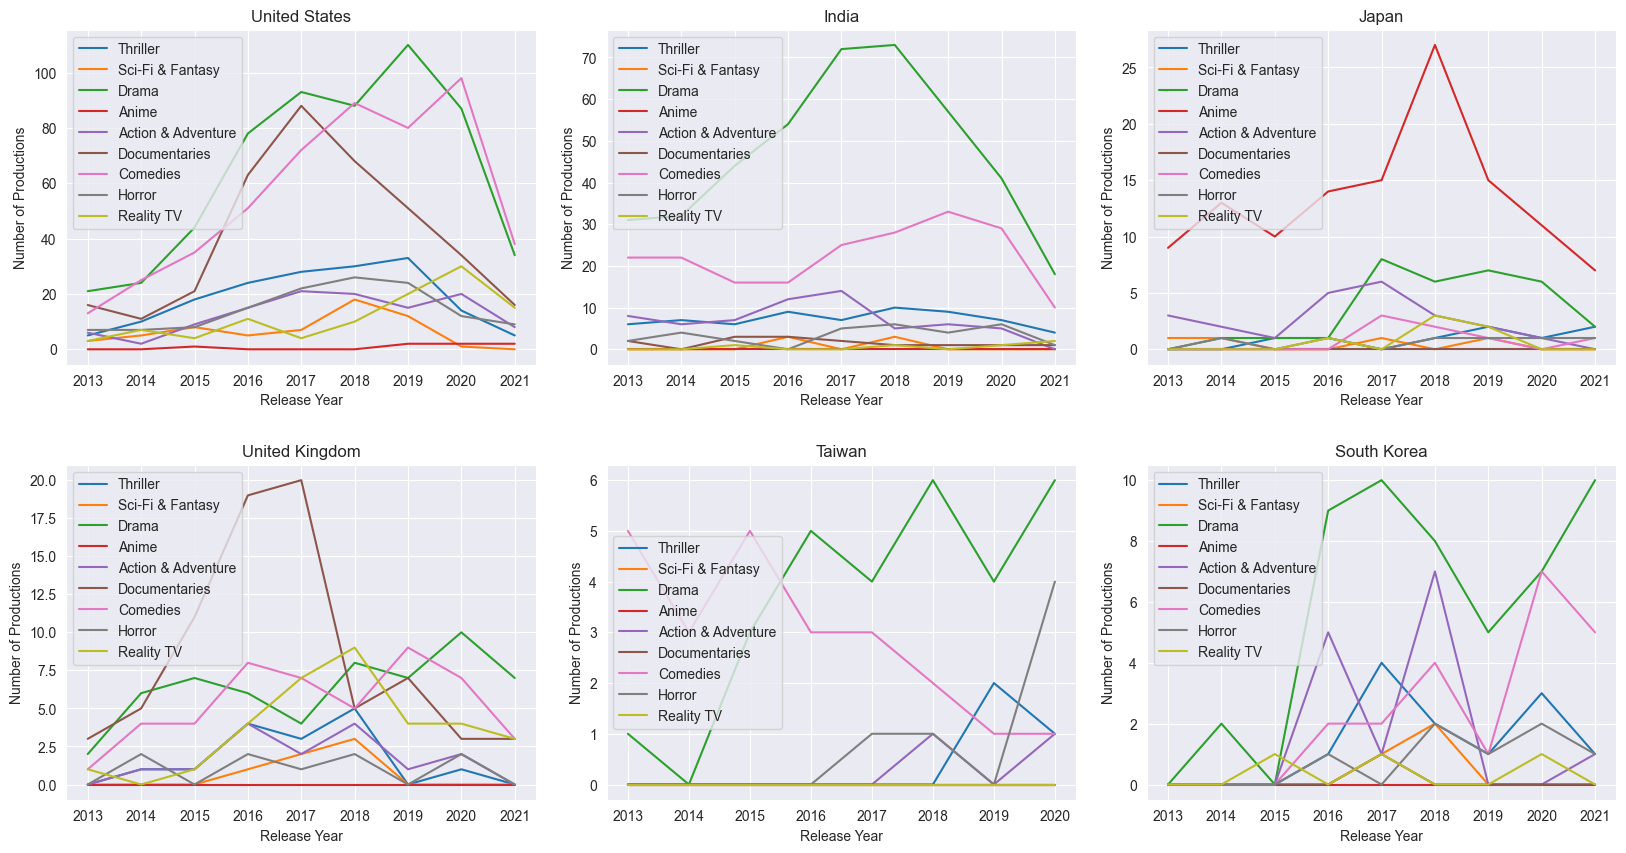

In [76]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
counter = 0
for row in range(2):
    for col in range(3):
        ax = axes[row, col]

        for genre in interesting_genres:
            sns.lineplot(data=genre_dict[interesting_countries[counter]][genre], x=genre_dict[interesting_countries[counter]][genre].keys(), y=genre_dict[interesting_countries[counter]][genre].values(), label=genre,
                         ax=ax)

        ax.set_title(interesting_countries[counter])
        ax.set_xlabel('Release Year')
        ax.set_ylabel('Number of Productions')
        counter += 1
                #ax.text(country)

plt.subplots_adjust(wspace=0.15, hspace=0.3)
